In [20]:
import os, sys
import yaml
import itertools
from collections import defaultdict
from pathlib import Path
# from src.runner import Runner
# from src.eval import Eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def mad(x):
    med = np.median(x)
    return np.median(np.abs(x - med))

In [22]:
base_dir = "/data/jeff-law/projects/2019-04-single-cell/RNMethods"
os.chdir(base_dir)

In [23]:
def summarize(s, cutoff=0, less_than=False):
    print('\t'.join(['median','MAD','cutoff','perc']))
    if less_than:
        perc_pass_cutoff = len(s[s <= cutoff]) / float(len(s))*100
    else:
        perc_pass_cutoff = len(s[s >= cutoff]) / float(len(s))*100
    print("%0.2f\t%0.2f\t%0.2f\t%0.1f" % (s.median(), mad(s.values), cutoff, perc_pass_cutoff))

In [24]:
def summary_plt(df, alg, dataset, measure='AUROC'):
    df[measure].plot.hist(bins=20)
    plt.xlabel(measure)
    plt.title("%s - %s" % (alg, dataset))
    plt.show()
    plt.close()

In [25]:
def get_best_params(df, measure, cutoff, less_than=False):
    best_params = defaultdict(set)
#     params_list = ['l','dT','nl','kw','pz','pr','nr']
    if less_than:
        pass_cutoff = df[df[measure] <= cutoff]['params']
    else:
        pass_cutoff = df[df[measure] >= cutoff]['params']        
    for param in pass_cutoff:
        for i, param_val in enumerate(param.split('-')):
            p = params_list[i]
            val = param_val.replace(p,'')
            best_params[p].add(val)
    print('\t'.join(p for p in params_list))
    print('\t'.join(','.join(best_params[p]) for p in params_list))

In [26]:
def get_param_list(df):
    params_list = []
    for i, param_val in enumerate(df['params'].values[0].split('-')):
        # the parameter name could be multiple letters. Find the first index of a number
        num_idx = min([j for j in range(len(param_val)) if param_val[j].isdigit()])
        p = param_val[:num_idx]
        params_list.append(p)
    return params_list

In [32]:
def get_dataset(eval_file):
    df = pd.read_csv(eval_file, header=0)
    df = df[df['alg'] == alg]
    
    params_list = get_param_list(df)
    print("params list: ", params_list)
    print("%d values" % (len(df)))
    
    # expand the parameters into their own columns
    params_df = df['params'].str.split('-', expand=True)
    # df = df.copy()
    for i, col in enumerate(params_df.columns):
        p = params_list[i]
        df[p] = params_df[col].apply(lambda x: float(x.replace(p,'')))
        
    df = remove_empty_nets(df)
    return df, params_list

In [33]:
def remove_empty_nets(df):
#     print("summary of no edges: ")
    summarize(df['num_edges'], 1, less_than=True)
    get_best_params(df, 'num_edges', 1, less_than=True)
    # remove the rows with no edges
    print("removing %d rows with no edges" % (len(df[df['num_edges'] == 0])))
    df = df[df['num_edges'] > 0] 
    return df

In [45]:
alg = "SCINGE"
# simulations = "GSD"
# simulations = "HSC"
simulations = "mCAD"
# simulations = "VSC"
indexes = range(10)
# indexes = range(1)
# datasets = ["%s_500_%d"%(simulations, i) for i in indexes]
datasets = ["%s_2000_%d"%(simulations, i) for i in indexes]
# datasets = ["%s_5000_%d"%(simulations, i) for i in indexes]
dataset = datasets[0]

params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
480 values
median	MAD	cutoff	perc
18.50	2.50	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


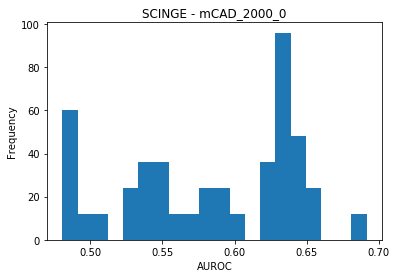

median	MAD	cutoff	perc
0.59	0.04	0.69	2.5
l	dT	nl	kw	pz	pr	nr
0	15	5	4	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
480 values
median	MAD	cutoff	perc
19.00	2.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


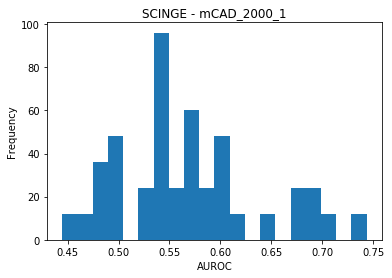

median	MAD	cutoff	perc
0.55	0.04	0.74	2.5
l	dT	nl	kw	pz	pr	nr
0	5	9	1	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
480 values
median	MAD	cutoff	perc
20.00	1.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


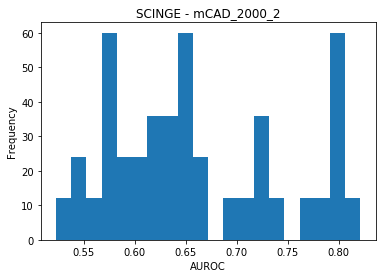

median	MAD	cutoff	perc
0.64	0.06	0.82	2.5
l	dT	nl	kw	pz	pr	nr
0	9	5	0.5	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
480 values
median	MAD	cutoff	perc
20.00	1.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


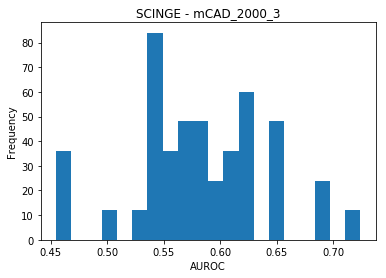

median	MAD	cutoff	perc
0.58	0.04	0.72	2.5
l	dT	nl	kw	pz	pr	nr
0	9	5	0.5	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
480 values
median	MAD	cutoff	perc
17.50	3.50	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


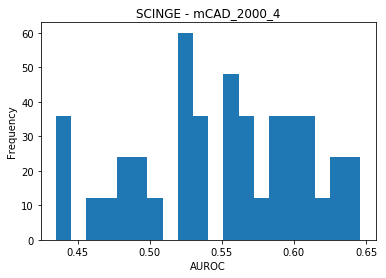

median	MAD	cutoff	perc
0.56	0.04	0.65	2.5
l	dT	nl	kw	pz	pr	nr
0	15	5	0.5	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
480 values
median	MAD	cutoff	perc
20.00	1.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


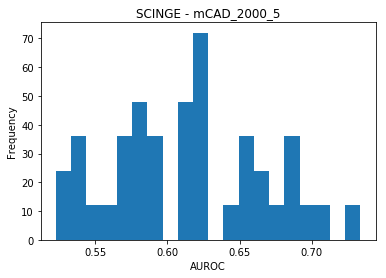

median	MAD	cutoff	perc
0.62	0.04	0.73	2.5
l	dT	nl	kw	pz	pr	nr
0	5	15	1	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
204 values
median	MAD	cutoff	perc
19.00	1.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


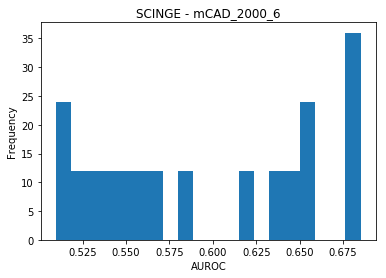

median	MAD	cutoff	perc
0.58	0.06	0.69	11.8
l	dT	nl	kw	pz	pr	nr
0	3,5	5,9	0.5,2	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
204 values
median	MAD	cutoff	perc
18.00	2.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


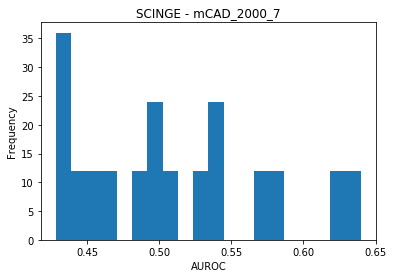

median	MAD	cutoff	perc
0.50	0.05	0.64	5.9
l	dT	nl	kw	pz	pr	nr
0	5	9	1	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
204 values
median	MAD	cutoff	perc
17.00	4.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


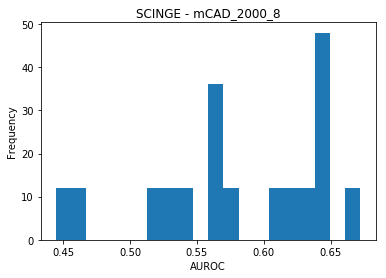

median	MAD	cutoff	perc
0.57	0.06	0.67	5.9
l	dT	nl	kw	pz	pr	nr
0	5	9	1	0.2,0	0.2,0	6,2,10

--------------------------------------------------
params list:  ['l', 'dT', 'nl', 'kw', 'pz', 'pr', 'nr']
204 values
median	MAD	cutoff	perc
19.00	2.00	1.00	0.0
l	dT	nl	kw	pz	pr	nr
						
removing 0 rows with no edges


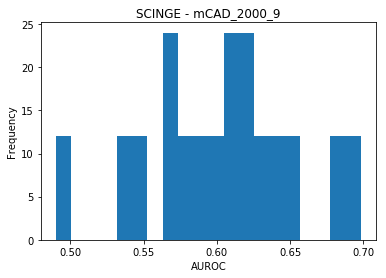

median	MAD	cutoff	perc
0.61	0.04	0.70	5.9
l	dT	nl	kw	pz	pr	nr
0.01	5	9	0.5	0.2,0	0.2,0	6,2,10

--------------------------------------------------


In [46]:
for dataset in datasets:
    eval_file = "outputs/simulated/%s/%s/eval.csv" % (simulations, dataset)
    df, params_list = get_dataset(eval_file)
    # measure = 'AUROC'
    quantile = 0.99
    # measures = ['AUROC', 'AUPRC', 'FMAX']
    measures = ['AUROC']
    for measure in measures:
        summary_plt(df, alg, dataset, measure=measure)
        cutoff = df[measure].quantile(quantile)
        summarize(df[measure], cutoff)
        get_best_params(df, measure, cutoff)
    
    print("%s\n" % "-"*50)

In [165]:
summarize(df['num_edges'], 20, less_than=True)
get_best_params(df, 'num_edges', 200, less_than=True)

median	MAD	cutoff	perc
19.00	12.50	20.00	50.1
l	dT	nl	kw	pz	pr	nr
0.01,0.02,0	5,9,3,15	5,9,15	0.5,2,4,1	0.5,0,0.2	0.5,0,0.2	6,2,10


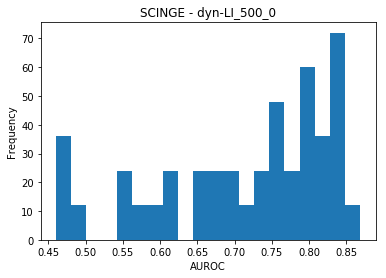

median	MAD	cutoff	perc
0.75	0.08	0.87	2.5
l	dT	nl	kw	pz	pr	nr
0.01	5	15	0.5	0.2,0	0.2,0	6,2,10


In [31]:
# measure = 'AUROC'
quantile = 0.99
# measures = ['AUROC', 'AUPRC', 'FMAX']
measures = ['AUROC']
for measure in measures:
    summary_plt(df, alg, dataset, measure=measure)
    cutoff = df[measure].quantile(quantile)
    summarize(df[measure], cutoff)
    get_best_params(df, measure, cutoff)